# -------------------------------------------------
# Brain Tumor Detection using CNN
# Cleaned and Enhanced Version (Production Ready)
# --------------------------------------------------

# **==== Step 1: Import Libraries ====**

In [ ]:
import os
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import normalize, to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

## **Set the image directory path (Change to your dataset path)**

In [ ]:
image_directory = 'E:/Projects/Brain tumor project/archive (1)'

## **Image folders**

In [ ]:
no_tumor_path = os.path.join(image_directory, 'no')
yes_tumor_path = os.path.join(image_directory, 'yes')

## **Image size**

In [ ]:
Input_size = 64

## **Data and labels**

In [ ]:
dataset = []
label = []

## **Function to load and preprocess images**

In [ ]:
def load_images_from_folder(folder, label_value):
    for image_name in os.listdir(folder):
        if image_name.endswith('.jpg'):
            try:
                image_path = os.path.join(folder, image_name)
                image = cv2.imread(image_path)
                image = Image.fromarray(image, 'RGB')
                image = image.resize((Input_size, Input_size))
                dataset.append(np.array(image))
                label.append(label_value)
            except Exception as e:
                print(f"Failed to load image {image_name}: {e}")

## **Load images with respective labels (0 = no tumor, 1 = tumor)**

In [ ]:
load_images_from_folder(no_tumor_path, 0)
load_images_from_folder(yes_tumor_path, 1)

## **Convert to numpy arrays**

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

## **Sanity check**

In [ ]:
assert len(dataset) == len(label)

## **Split the data with stratified sampling**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset, label, test_size=0.4, random_state=42, stratify=label)

## **Normalize image data**

In [ ]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

## **One-hot encode labels**

In [ ]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

## **Build Sequential CNN model**

In [ ]:
model = Sequential()

## **Convolutional Layer 1**

In [ ]:
model.add(Conv2D(32, (3, 3), input_shape=(Input_size, Input_size, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Layer 2**

In [ ]:

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## **Layer 3**

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## **Fully connected layers**

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

## **Compile the model**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## **Train the model**

In [ ]:
model.fit(X_train, y_train, epochs=18, batch_size=16, verbose=1, validation_data=(X_test, y_test))

Epoch 1/18
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.6397 - loss: 0.6323 - val_accuracy: 0.7867 - val_loss: 0.4707
Epoch 2/18
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.7974 - loss: 0.4498 - val_accuracy: 0.8358 - val_loss: 0.3649
Epoch 3/18
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.8583 - loss: 0.3465 - val_accuracy: 0.8667 - val_loss: 0.3068
Epoch 4/18
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.8953 - loss: 0.2733 - val_accuracy: 0.8758 - val_loss: 0.3121
Epoch 5/18
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.9226 - loss: 0.2097 - val_accuracy: 0.9325 - val_loss: 0.1790
Epoch 6/18
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.9532 - loss: 0.1377 - val_accuracy: 0.9417 - val_loss: 0.1588
Epoch 7/18
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.9683 - loss: 0.0839 - val_accuracy: 0.9367 - val_loss: 0.1684
Epoch 8/18
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9852 - loss: 0.0548 - val_a

## **Save the trained model**

In [ ]:
model.save('BrainTumor_CNN_Model.h5')

## **Evaluate the model**

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {score[1]*100:.2f}%")

Test Accuracy: 96.50%


## ***Generate predictions***

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


## ***Classification report***

In [ ]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       600
           1       0.95      0.98      0.97       600

    accuracy                           0.96      1200
   macro avg       0.97      0.97      0.96      1200
weighted avg       0.97      0.96      0.96      1200



## ***Confusion matrix***

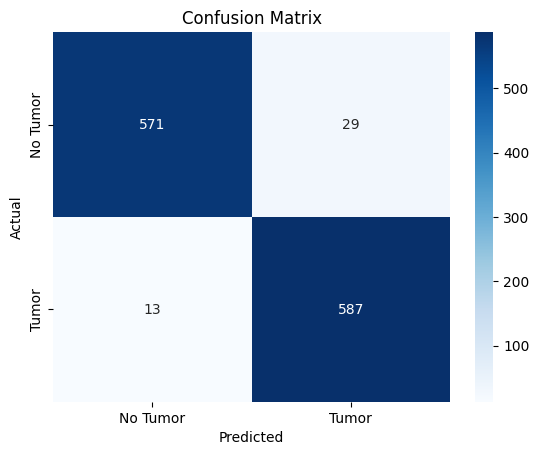

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
